In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from random import randrange

ModuleNotFoundError: No module named 'numpy'

In [8]:
usecols = tuple(range(1, 784))
data = np.genfromtxt('../data/train.csv', delimiter=',', skip_header=1, usecols=usecols)

In [61]:
file_path = '../data/train.csv'
df = pd.read_csv(file_path)

In [209]:
def load_train_data():   
    df = pd.read_csv('../data/train.csv')
    xs = df.iloc[:, 1:]
    ys = df.iloc[:, 0]
    labels = ys.unique()
    means, covariances, priors = {}, {}, {}
    for y in labels: 
        means[y] = xs[ys == y].mean().values # mean value of each pixel accross examples converted to numpy
        covariances[y] = xs[ys == y].cov().values # relationshops between pixels
        priors[y] = len(xs[ys == y]) / len(xs) # p(y)
    return xs, ys, labels, means, covariances, priors

def load_test_data():
    xs = pd.read_csv('../data/train.csv')
    return xs


In [200]:
X = df.iloc[:, 1:]
ys = df.iloc[:, 0]
labels = ys.unique()

means = {}
covariances = {}
priors = {}
for y in labels:   
    means[y] = X[ys == y].mean().values # mean value of each pixel accross examples converted to numpy
    covariances[y] = X[ys == y].cov().values
    priors[y] = len(X[ys == y]) / len(ys) # p(y)

print(means[0].shape, covariances[0].shape)

(784,) (784, 784)


In [148]:
def visualize_mnist_digit(digit_array):   
    digit_image = digit_array.reshape(28, 28)
    plt.imshow(digit_image, cmap='gray')
    plt.axis('off')
    plt.show()

In [196]:
def predict(x, means, covariances, priors):
    log_posteriors = {}
    for y in labels:
        log_likelihood = multivariate_normal.logpdf(x, mean=means[y], cov=covariances[y], allow_singular=True)
        log_posteriors[y] = log_likelihood + np.log(priors[y])

    max_log_posterior = max(log_posteriors.values()) # prevent underflow with the log-sum-exp trick
    posteriors = {y: np.exp(log_posteriors[y] - max_log_posterior) for y in labels}
    total_posterior = sum(posteriors.values())
    for y in labels:
        posteriors[y] /= total_posterior
    return max(posteriors, key=posteriors.get)

(784,)
(784, 784)
True: 2, Pred: 2


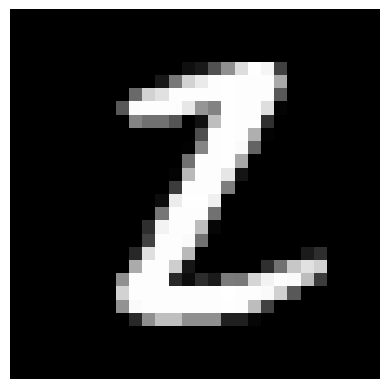

In [208]:
xs, ys, labels, means, covariances, priors = load_train_data()

def sample_train_image(xs, ys, means, covariances, priors):
    index = randrange(len(xs))
    new_sample = xs.iloc[index].values
    label = ys.iloc[index]
    result = predict(new_sample, means, covariances, priors)
    print(f'True: {label}, Pred: {result}') 
    visualize_mnist_digit(new_sample)

def sample_test_image(xs, means, covariances, priors):
    index = randrange(len(xs))
    new_sample = xs.iloc[index].values
    result = predict(new_sample, means, covariances, priors)
    print(f'Pred: {result}') 
    visualize_mnist_digit(new_sample)

sample_train_image(xs, ys, means, covariances, priors)

# index = 0
# new_sample = xs_test.iloc[index].values
# label = ys_test.iloc[index]

# result = predict(new_sample)
# print(f'True: {label}, Pred: {result}') 
# visualize_mnist_digit(new_sample)